# Deep Learning Hands-On 2019
----
## Content

- DL Introduction
- Basic Regularization
  - *Early Stopping*
  - *Dropout*
  - *Weight Penalty*
  - *Normalization*
- Convolutional Neural Network
- Recurrent Neural Network
- Autoencoder **(CNN & RNN)**
  - *Denoising*
  - *U-Net*
  - *Variational*
- Implementations
  - Paper 1
  - Paper 2


## Import Libraries
----

In [0]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

def show_number(data,true,pred):
  print(data.shape)
  print(len(data.shape))
  if len(data.shape) == 4:
    a,b,c, _ = data.shape
    data.shape = (a,b,c)
  else:
    pass
  f, ax = plt.subplots(4,4)
  f.set_size_inches(8,8)
  img_idx = 0
  for i in range(0,4):
    for j in range(0,4):
      ax[i][j].axis('off')
      ax[i][j].imshow(data[img_idx],cmap=plt.cm.binary)
      ax[i][j].set_title('True label: %d\nPred label: %d'%(true[img_idx],pred[img_idx]))
      img_idx += 1
  plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)
  plt.show()

def change_dim(data,to_):
  print()
  dim = len(data.shape)
  if to_ == 'cnn' and dim == 3:
    data = np.expand_dims(data, axis=3)
  elif to_ == 'rnn' and dim == 4:
    data = np.squeeze(data, axis=3)
  else:
    print('Data already on format or dimension fail')
  return data

11493376/11490434 [==============================] - 0s 0us/step
Training xy:  (60000, 28, 28) (60000,)
Testing  xy:  (10000, 28, 28) (10000,)
(25, 28, 28)
3


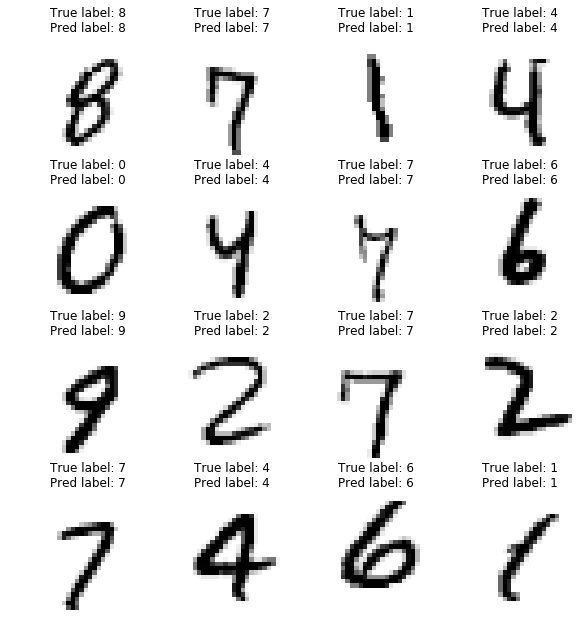

In [0]:
# Read the data
(train_images, train_labels), (test_images, test_labels) = K.datasets.mnist.load_data()
print('Training xy: ',train_images.shape,train_labels.shape)
print('Testing  xy: ',test_images.shape,test_labels.shape)
train_images = train_images / 255.
test_images  = test_images / 255.
rnd_idx = np.random.choice(len(test_labels),25)
show_number(test_images[rnd_idx], test_labels[rnd_idx], test_labels[rnd_idx])

## DL Introduction
---

In [0]:
model = K.Sequential([
    K.layers.Flatten(input_shape=(28,28)),
    K.layers.Dense(128, activation=tf.nn.relu),
    K.layers.Dense(10, activation=tf.nn.softmax)
])
print(model.summary())

W0822 12:59:20.235161 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

pred_label = np.argmax(model.predict(test_images),axis=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 5s - loss: 0.2551 - acc: 0.9272 - val_loss: 0.1404 - val_acc: 0.9579
Epoch 2/5
60000/60000 - 4s - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0949 - val_acc: 0.9710
Epoch 3/5
60000/60000 - 4s - loss: 0.0762 - acc: 0.9770 - val_loss: 0.0874 - val_acc: 0.9735
Epoch 4/5
60000/60000 - 4s - loss: 0.0569 - acc: 0.9825 - val_loss: 0.0789 - val_acc: 0.9749
Epoch 5/5
60000/60000 - 4s - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0717 - val_acc: 0.9786


(25, 28, 28)
3


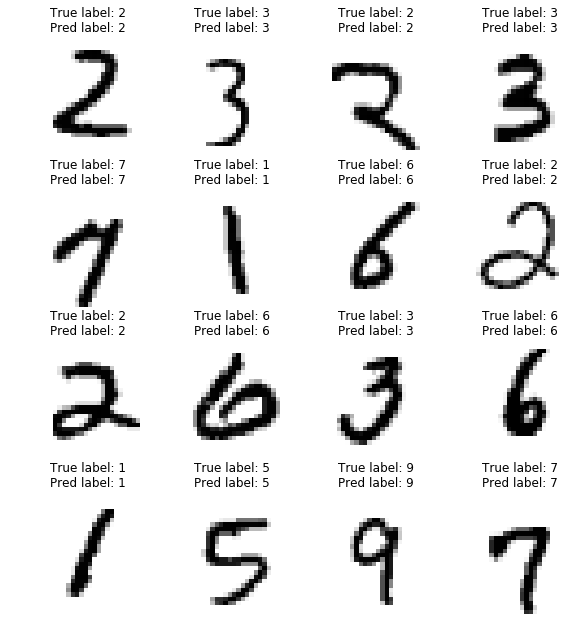

In [0]:
rnd_idx = np.random.choice(len(pred_label),25)
show_number(test_images[rnd_idx], test_labels[rnd_idx], pred_label[rnd_idx])

## Regularization


[Are Deep Neural Networks Dramatically Overfitted?](https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html)

---

### Early Stopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

print(model.summary())

# saves the model weights after each epoch if the validation loss decreased
checkpointer = ModelCheckpoint(filepath='./weights.hdf5', verbose=1, save_best_only=True)
early_stop   = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=2, verbose=1, mode='auto')

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels),
         callbacks=[checkpointer, early_stop])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.07774, saving model to ./weights.hdf5
60000/60000 - 4s - loss: 0.0346 - acc: 0.9892 - val_loss: 0.0777 - val_acc: 0.9762
Epoch 2/5

Epoch 00002: val_loss did not improve from 0.07774
60000/60000 - 4s - loss: 0.0272 - acc: 0.9919 - val_loss: 0.0798 - val_acc: 0.9766
Epo

### Dropout

In [0]:
rate = 0.5

model = K.Sequential([
    K.layers.Flatten(input_shape=(28,28)),
    K.layers.Dropout(rate),
    K.layers.Dense(128, activation=tf.nn.relu),
    K.layers.Dropout(rate),
    K.layers.Dense(10, activation=tf.nn.softmax)
])
print(model.summary())

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 5s - loss: 0.6017 - acc: 0.8108 - v

### Weight Penalty

In [0]:
from tensorflow.keras import regularizers
import tensorflow.keras.backend as bk

def l1_reg(weight_matrix):
    return 0.01 * bk.sum(bk.abs(weight_matrix))

model = K.Sequential()
model.add(K.layers.Flatten(input_shape=(28,28)))
model.add(K.layers.Dense(128, input_dim=784, 
                kernel_initializer='uniform',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(K.layers.Activation('relu'))
model.add(K.layers.Dropout(rate))
model.add(K.layers.Dense(10, input_dim=64,
                kernel_initializer='uniform',
                kernel_regularizer=l1_reg))
model.add(K.layers.Activation('softmax'))

print(model.summary())

W0822 13:00:29.416440 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 6s - loss: 1.4254 - acc: 0.7816 - val_loss: 1.1568 - val_acc: 0.8800
Epoch 2/5
60000/60000 - 6s - loss: 1.3393 - acc: 0.7969 - val_loss: 1.1732 - val_acc: 0.8587
Epoch 3/5
60000/60000 - 6s - loss: 1.3312 - acc: 0.7948 - val_loss: 1.1112 - val_acc: 0.8868
Epoch 4/5
60000/60000 - 6s - loss: 1.3195 - acc: 0.7946 - val_loss: 1.0965 - val_acc: 0.8854
Epoch 5/5
60000/60000 - 6s - loss: 1.3132 - acc: 0.7947 - val_loss: 1.0935 - val_acc: 0.8828


### Normalization

In [0]:
model = K.Sequential()
model.add(K.layers.Flatten(input_shape=(28,28)))
model.add(K.layers.Dense(128, input_dim=784, 
                kernel_initializer='normal'))
model.add(K.layers.Activation('relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(10, input_dim=64,
                kernel_initializer='normal'))
model.add(K.layers.Activation('softmax'))

print(model.summary())

W0822 13:00:59.078168 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 102,282
Trainable params: 102,026
Non-trainable params: 256
______________________________________________

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 6s - loss: 0.2135 - acc: 0.9366 - val_loss: 0.1370 - val_acc: 0.9552
Epoch 2/5
60000/60000 - 5s - loss: 0.1210 - acc: 0.9633 - val_loss: 0.1049 - val_acc: 0.9688
Epoch 3/5
60000/60000 - 5s - loss: 0.0955 - acc: 0.9698 - val_loss: 0.0972 - val_acc: 0.9698
Epoch 4/5
60000/60000 - 5s - loss: 0.0798 - acc: 0.9747 - val_loss: 0.0904 - val_acc: 0.9742
Epoch 5/5
60000/60000 - 5s - loss: 0.0728 - acc: 0.9765 - val_loss: 0.0953 - val_acc: 0.9747


### Grid Search

In [0]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
  # create model
  model = K.Sequential()
  model.add(K.layers.Flatten(input_shape=(28,28)))
  model.add(K.layers.Dense(128, activation='relu'))
  model.add(K.layers.Dense(10, activation='softmax'))
  # Compile model
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [0]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [16, 32]
epochs = [1, 3, 5]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1)
grid_result = grid.fit(test_images, test_labels)


In [0]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.933000 using {'batch_size': 16, 'epochs': 5}
0.904100 (0.024067) with: {'batch_size': 16, 'epochs': 1}
0.925700 (0.015564) with: {'batch_size': 16, 'epochs': 3}
0.933000 (0.010930) with: {'batch_size': 16, 'epochs': 5}
0.900000 (0.019551) with: {'batch_size': 32, 'epochs': 1}
0.919100 (0.015411) with: {'batch_size': 32, 'epochs': 3}
0.930100 (0.011512) with: {'batch_size': 32, 'epochs': 5}


## Convolutional Neural Network
---


In [0]:
# define the input
xi = K.Input((28,28,1))

# define the network
xn = K.layers.Dropout(rate)(xi)
xn = K.layers.Conv2D(64, (3,3), padding='same', activation='relu')(xn)
xn = K.layers.BatchNormalization()(xn)
xn = K.layers.Conv2D( 1, (3,3), padding='same', activation='relu')(xn)
xn = K.layers.Flatten()(xn)

# define the output
xo = K.layers.Dense(10, activation='softmax')(xn)

model = K.Model(inputs=[xi], outputs=[xo])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 1)         577       
_________________________________________________________________
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                7850  

In [0]:
print(train_images.shape)
train_images = change_dim(train_images,'cnn')
test_images = change_dim(test_images,'cnn')
print(train_images.shape)


(60000, 28, 28)


(60000, 28, 28, 1)


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 253s - loss: 0.4425 - acc: 0.8637 - val_loss: 0.3606 - val_acc: 0.8920
Epoch 2/5
60000/60000 - 254s - loss: 0.3270 - acc: 0.9020 - val_loss: 0.3150 - val_acc: 0.9048
Epoch 3/5
60000/60000 - 254s - loss: 0.3074 - acc: 0.9062 - val_loss: 0.2585 - val_acc: 0.9253
Epoch 4/5
60000/60000 - 255s - loss: 0.2956 - acc: 0.9107 - val_loss: 0.2833 - val_acc: 0.9213
Epoch 5/5
60000/60000 - 255s - loss: 0.2834 - acc: 0.9148 - val_loss: 0.2925 - val_acc: 0.9089


## Reccurent Neural Networks
---

### LSTM and GRU

In [0]:
# define the input
xi = K.Input((28,28))

# define the network
xn = K.layers.Dropout(rate)(xi)
xn = K.layers.LSTM( 64, return_sequences=True)(xn)
xn = K.layers.BatchNormalization()(xn)
xn = K.layers.GRU(64, return_sequences=False)(xn)

# define the output
xo = K.layers.Dense(10, activation='softmax')(xn)

model = K.Model(inputs=[xi], outputs=[xo])
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 28, 64)            23808     
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 64)            256       
_________________________________________________________________
gru (GRU)                    (None, 64)                24768     
_________________________________________________________________
dense_47 (Dense)             (None, 10)                650       
Total params: 49,482
Trainable params: 49,354
Non-trainable params: 128
_____________________________________________________

In [0]:
print(train_images.shape)
train_images = change_dim(train_images,'rnn')
test_images = change_dim(test_images,'rnn')
print(train_images.shape)

(60000, 28, 28, 1)


(60000, 28, 28)


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
         verbose = 2,
         epochs = 5,
         batch_size = 32,
         validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples


W0822 13:24:30.281183 140612855375744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
60000/60000 - 103s - loss: 0.3263 - acc: 0.8930 - val_loss: 0.1256 - val_acc: 0.9626
Epoch 2/5
60000/60000 - 100s - loss: 0.1526 - acc: 0.9523 - val_loss: 0.0834 - val_acc: 0.9753
Epoch 3/5
60000/60000 - 100s - loss: 0.1287 - acc: 0.9605 - val_loss: 0.0706 - val_acc: 0.9781
Epoch 4/5
60000/60000 - 101s - loss: 0.1197 - acc: 0.9627 - val_loss: 0.0691 - val_acc: 0.9785
Epoch 5/5
60000/60000 - 101s - loss: 0.1133 - acc: 0.9650 - val_loss: 0.0617 - val_acc: 0.9799


### Bidirectional

In [0]:
# define the input
xi = K.Input((28,28))

# define the network
xn = K.layers.Dropout(rate)(xi)
xn = K.layers.Bidirectional(K.layers.LSTM( 32, return_sequences=True), merge_mode='ave')(xn)
xn = K.layers.BatchNormalization()(xn)
xn = K.layers.Bidirectional(K.layers.LSTM(32, return_sequences=False), merge_mode='ave')(xn)

# define the output
xo = K.layers.Dense(10, activation='softmax')(xn)

model = K.Model(inputs=[xi], outputs=[xo])
print(model.summary())

W0822 13:33:13.101904 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 13:33:13.103652 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Orthogonal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0822 13:33:13.105262 140612855375744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is de

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 28, 32)            15616     
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 32)            128       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                16640     
_________________________________________________________________
dense_48 (Dense)             (None, 10)                330       
Total params: 32,714
Trainable params: 32,650
Non-trainable params: 64
______________________________________________________

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.003),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(x = train_images,
          y = train_labels,
          verbose = 2,
          epochs = 5,
          batch_size = 32,
          validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 133s - loss: 0.3366 - acc: 0.8944 - val_loss: 0.1276 - val_acc: 0.9604
Epoch 2/5
60000/60000 - 128s - loss: 0.1526 - acc: 0.9531 - val_loss: 0.0825 - val_acc: 0.9755
Epoch 3/5
60000/60000 - 128s - loss: 0.1286 - acc: 0.9593 - val_loss: 0.0636 - val_acc: 0.9805
Epoch 4/5
60000/60000 - 128s - loss: 0.1161 - acc: 0.9647 - val_loss: 0.0660 - val_acc: 0.9793
Epoch 5/5
60000/60000 - 128s - loss: 0.1023 - acc: 0.9673 - val_loss: 0.0562 - val_acc: 0.9812


## Autoencoder
---

In [0]:
print(train_images.shape)
train_images = change_dim(train_images,'cnn')
test_images = change_dim(test_images,'cnn')
print(train_images.shape)

(60000, 28, 28)


(60000, 28, 28, 1)


### Sparse AE

In [0]:
import tensorflow.keras.layers as L

def AutoEncoder(input_shape, layer_filters, latent_dim):
    # First, build the Encoder Model
    kernel_size = 3
    inputs = K.Input(shape=input_shape, name='encoder_input')
    x = inputs
    for filters in layer_filters:
        x = L.Conv2D( filters=filters,
                      kernel_size=kernel_size,
                      activation='relu',
                      padding='same')(x)

    shape = bk.int_shape(x)
    x = L.Flatten()(x)
    latent = L.Dense(latent_dim, name='latent_vector')(x)

    x = L.Dense(shape[1]*shape[2]*shape[3])(latent)
    x = L.Reshape((shape[1], shape[2], shape[3]))(x)
    for filters in layer_filters[::-1]:
        x = L.Conv2DTranspose( filters=filters,
                              kernel_size=kernel_size,
                              activation='relu',
                              strides=1,
                              padding='same')(x)
    x = L.Conv2D(filters=1,
               kernel_size=kernel_size,
               padding='same')(x)
    outputs = L.Activation('sigmoid', name='decoder_output')(x)
    decoder = K.Model(inputs, outputs, name='auto_encoder')
    return decoder

In [0]:
# Autoencoder(input_shape(m,n), layer_filters, latent dim)
autoencoder = AutoEncoder(train_images.shape[1:],[32,16], 256)
autoencoder.summary()

Model: "auto_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
flatten_24 (Flatten)         (None, 12544)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 256)               3211520   
_________________________________________________________________
dense_49 (Dense)             (None, 12544)             3223808   
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 16)       

In [0]:
# Compile ,fit and evaluate model to the data
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.fit(x = train_images,
                y = train_images,
                verbose = 2,
                epochs = 5,
                batch_size = 32,
                validation_data = (test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 427s - loss: 0.0083 - val_loss: 0.0018
Epoch 2/5
60000/60000 - 424s - loss: 0.0014 - val_loss: 0.0012
Epoch 3/5
60000/60000 - 426s - loss: 9.9066e-04 - val_loss: 8.7838e-04
Epoch 4/5
60000/60000 - 426s - loss: 7.6622e-04 - val_loss: 7.8405e-04
Epoch 5/5
60000/60000 - 425s - loss: 6.1601e-04 - val_loss: 5.6936e-04


### VAE

In [0]:
def sampling(args):
    z_mean, z_log_var = args
    batch = bk.shape(z_mean)[0]
    dim = bk.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = bk.random_normal(shape=(batch, dim))
    return z_mean + bk.exp(0.5 * z_log_var) * epsilon

def VAE(input_shape, latent_dim):
    # VAE model = encoder + decoder
    # build encoder model
    intermediate_dim = 512
    xi = K.Input(shape=input_shape, name='encoder_input')
    x1 = L.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  activation='relu',
                  padding='valid')(xi)
    x1 = L.MaxPooling2D()(x1)
    
    shape = bk.int_shape(x1)
    x1 = L.Flatten()(x1)
    x1 = L.Dense(intermediate_dim, activation='relu')(x1)
    
    z_mean = L.Dense(latent_dim, name='z_mean')(x1)
    z_log_var = L.Dense(latent_dim, name='z_log_var')(x1)
    z = L.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    x2 = L.Dense(intermediate_dim, activation='relu')(z)
    x2 = L.Dense(shape[1] * shape[2] * shape[3])(x2)
    x2 = L.Reshape((shape[1], shape[2], shape[3]))(x2)
    x2 = L.UpSampling2D()(x2)
    
    x2 = L.Conv2DTranspose(filters=64,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           padding='valid')(x2)
    xo = L.Conv2DTranspose(filters=1,
                            kernel_size=3,
                            padding='same')(x2)
    
    vae = K.Model(xi, xo, name='vae_mlp')
    return vae

In [0]:
# Autoencoder(input_shape(m,n), layer_filters, latent dim)
vae = VAE(train_images.shape[1:], 256)
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 26, 26, 64)   640         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 64)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
flatten_25 (Flatten)            (None, 10816)        0           max_pooling2d[0][0]              
____________________________________________________________________________________________

In [0]:
# Compile ,fit and evaluate model to the data
vae.compile(loss='mse', optimizer='adam')
vae.fit(x = train_images,
        y = train_images,
        verbose = 2,
        epochs = 5,
        batch_size = 32,
        validation_data = (test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 552s - loss: 0.0104 - val_loss: 0.0047
Epoch 2/5
60000/60000 - 550s - loss: 0.0040 - val_loss: 0.0034
Epoch 3/5
60000/60000 - 552s - loss: 0.0031 - val_loss: 0.0028
Epoch 4/5
60000/60000 - 553s - loss: 0.0026 - val_loss: 0.0026
Epoch 5/5
60000/60000 - 549s - loss: 0.0023 - val_loss: 0.0021


### U-Net

In [0]:
def Autoencoder_Unet(input_shape, latent_dim):
    filters = [32,64,128,128,64,32]
    kernel_size = 3

    xi = K.Input(shape=input_shape, name='encoder_input')
    x1 = L.Conv2D(filters=filters[0],
                  kernel_size=(kernel_size,1),
                  activation='relu',
                  padding='valid')(xi)
    x1 = L.MaxPooling2D()(x1)
    x2 = L.Conv2D(filters=filters[1],
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x1)
    x3 = L.Conv2D(filters=filters[2],
               kernel_size=kernel_size,
               activation='relu',
               padding='same')(x2)
    shape = bk.int_shape(x3)
    xf = L.Flatten()(x3)
    xf = L.Dense(latent_dim, name='latent_vector')(xf)
    xf = L.Dense(shape[1] * shape[2] * shape[3])(xf)
    xf = L.Reshape((shape[1], shape[2], shape[3]))(xf)

    x4 = L.Conv2DTranspose(filters=filters[3],
                        kernel_size=kernel_size,
                        activation='relu',
                        padding='same')(xf)
    x4 = L.Add()([x3,x4])
    x5 = L.Conv2DTranspose(filters=filters[4],
                        kernel_size=kernel_size,
                        activation='relu',
                        padding='same')(x4)
    x5 = L.Add()([x2,x5])
    x6 = L.Conv2DTranspose(filters=filters[5],
                        kernel_size=kernel_size,
                        activation='relu',
                        padding='same')(x5)
    x6 = L.Add()([x1,x6])
    x6 = L.UpSampling2D()(x6)
    x6 = L.ZeroPadding2D((1,0))(x6)
    xo = L.Conv2DTranspose(filters=1,
                            kernel_size=kernel_size,
                            padding='same')(x6)
    xo = L.Activation('sigmoid', name='decoder_output')(xo)
    autoencoder = K.Model(xi, xo, name='autoencoder')
    return autoencoder

In [0]:
# Autoencoder(input_shape(m,n), layer_filters, latent dim)
autoencoder_unet = Autoencoder_Unet(train_images.shape[1:], 256)
autoencoder_unet.summary()

Model: "autoencoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 26, 28, 32)   128         encoder_input[0][0]              
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 13, 14, 32)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 13, 14, 64)   18496       max_pooling2d_1[0][0]            
________________________________________________________________________________________

In [0]:
# Compile ,fit and evaluate model to the data
autoencoder_unet.compile(loss='mse', optimizer='adam')
autoencoder_unet.fit( x = train_images,
                      y = train_images,
                      verbose = 2,
                      epochs = 5,
                      batch_size = 32,
                      validation_data = (test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


## Paper 1

In [0]:
!pip install keras
!pip install keras-tcn

In [0]:
from keras import Input as k_Input
from keras import Model as k_Model
import keras.layers as kl
from tcn import TCN
xi = k_Input(shape=(28,28))

xn = TCN(nb_filters = 32,
         kernel_size=3,
         dilations=[2,4,8],
         nb_stacks=1,
         dropout_rate=0.5,
         activation='relu',
         return_sequences=False)(xi)
xn = kl.Dense(64, activation='relu')(xn)
xo = kl.Dense(10, activation='softmax')(xn)

model = k_Model(inputs=[xi], outputs=[xo])
print(model.summary())

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_images,
            y = train_labels, 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            verbose=0)

## Paper 2

In [0]:
!git clone https://github.com/titu1994/LSTM-FCN.git
!cd  LSTMFCN

In [0]:
from LSTMFCN.all_datasets_training import generate_lstmfcn
from LSTMFCN.all_datasets_training import generate_alstmfcn

In [0]:
print('LSTM and FCN')
model = generate_lstmfcn(MAX_SEQUENCE_LENGTH=28*28, NB_CLASS=10, NUM_CELLS=8)

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_images.reshape(-1,1,28*28),
            y = train_labels, 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            verbose=2)

In [0]:
model = generate_alstmfcn(MAX_SEQUENCE_LENGTH=28*28, NB_CLASS=10, NUM_CELLS=8)

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

model.fit(  x = train_data[0].reshape(-1,1,28*28),
            y = train_data[1], 
            epochs=5, 
            batch_size=32, 
            shuffle=True,
            validation_data = (test_data[0].reshape(-1,1,28*28),test_data[1]),
            verbose=2)

## Thanks